# K-최근접 이웃 이진 분류

## 교제 데이터 사용

In [22]:
import pandas as pd
import numpy as np

# pd.read_csv() : 교제 csv데이터를 읽는 함수
fish = pd.read_csv('https://bit.ly/fish_csv_data')
# fish 데이터 중 열의 이름이 Specites인 곳에서 데이터가 Bream이거나 Smelt인 값을 가진 행만 추출
fish = fish[(fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')]
# 상위 5개 데이터 확인
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [23]:
# 생선의 길이와 무게 데이터 사용, 타겟 종 설정
fish_input = fish[['Length','Weight']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [24]:
print(fish_input)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [25]:
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt'
 'Smelt' 'Smelt' 'Smelt' 'Smelt']


## 샘플링 편향 문제 해결

In [26]:
# scikit-learn 라이브러리에서 제공하는 함수로 데이터를 훈련 세트와 테스트 세트로 분할하기 위해 사용
from sklearn.model_selection import train_test_split

# random_state 값을 주는 이유는 항상 동일한 실행 결과 값을 얻기 위해서 사용함
# random_state 매개변수는 데이터를 무작위로 섞을 때 사용되는 시드(seed)값을 지정
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [27]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [28]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [29]:
print(test_target)

['Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream']


## 데이터 전처리

In [30]:
# np.mean() : numpy에서 제공하는 평균을 구하는 함수
# np.std() : numpy에서 제공하는 표준 편차를 구하는 함수
# axis = 0 : 각 열(axis=0)에 대해 계산을 지정하는 매개변수
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [31]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [32]:
# 데이터 표준화
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

## K-최근접 이웃 분류 수행하기

In [33]:
# KNeighborsClassifier : scikit-learn 라이브러리에서 제공되는 함수, K 최근접 이웃 분류기는 주어진 데이터의 이웃들을 기반으로 분류를 수행하는 머신러닝 알고리즘입니다.
from sklearn.neighbors import KNeighborsClassifier

#  K-최근접 이웃 분류 객체 생성
kn = KNeighborsClassifier()
# train_data로 훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [34]:
# 훈련된 모델로 test 데이터 분류
kn.predict(test_scaled)

array(['Bream', 'Smelt', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [35]:
# 모델의 정확도를 출력
kn.score(test_scaled, test_target)

1.0

In [36]:
# 새로운 데이터 분류
# 길이, 무게를 전처리를 통해 표준화
new = ([25, 150] - mean) / std

In [37]:
print(kn.predict([new]))

['Bream']


In [38]:
# 새로운 데이터(new)와 가장 가까운 이웃들의 거리와 인덱스를 distances와 indexes 변수에 저장하는 함수
distances, indexes = kn.kneighbors([new])

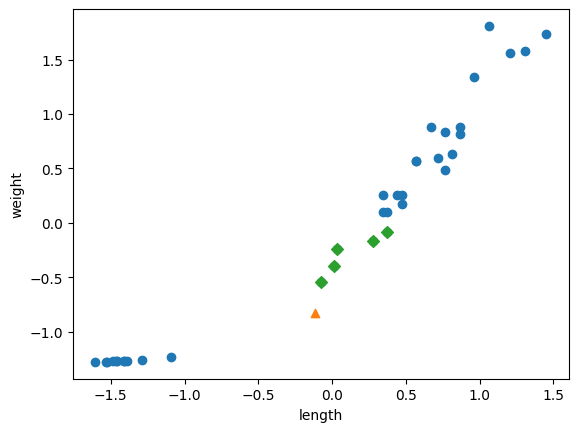

In [39]:
import matplotlib.pyplot as plt

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()